# Next word prediction using seq2seq (LSTM)

Tutorial by: geek for geeks

URL: https://www.geeksforgeeks.org/next-word-prediction-with-deep-learning-in-nlp/

In [2]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import regex as re

In [3]:
# convert into list of sentences
def file_to_sentence_list(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

    sentences = [sentence.strip() for sentence in re.split(r'(?<=[.!?])\s+', text) if sentence.strip()]
    return sentences

In [4]:
# convert into list of sentences
file_path = 'pizza.txt'
text_data = file_to_sentence_list(file_path)

# show
for sentence in text_data:
    print(sentence)

Pizza, the delectable and iconic dish that has transcended borders and captivated taste buds worldwide, is a testament to the extraordinary fusion of flavors, creativity, and cultural significance.
Originating from the sun-kissed lands of Italy, pizza has evolved into an art form that unites people from diverse backgrounds in a shared love for its mouthwatering combinations.
Its history stretches back centuries, with roots tracing back to ancient civilizations like the Greeks, Romans, and Egyptians, who all had their versions of flatbreads adorned with various ingredients.
However, it was the vibrant city of Naples, Italy, that birthed the pizza we know and adore today.
With its soft and chewy Neapolitan crust, topped with the perfect balance of tomatoes, mozzarella cheese, and fresh basil, the Margherita pizza pays homage to Queen Margherita of Italy and embodies the colors of the Italian flag.
As pizza migrated from the shores of Naples, it found its way to the United States with Ita

In [5]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

In [6]:
# tokenizer visualization
print(text_data[3])
print(tokenizer.texts_to_sequences([text_data[3]])[0])

However, it was the vibrant city of Naples, Italy, that birthed the pizza we know and adore today.
[256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1, 3, 54, 260, 2, 261, 128]


In [7]:
# Create input sequences
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [8]:
# visualization n-gram
input_sequences[83:100]

[[256, 12],
 [256, 12, 257],
 [256, 12, 257, 1],
 [256, 12, 257, 1, 126],
 [256, 12, 257, 1, 126, 258],
 [256, 12, 257, 1, 126, 258, 4],
 [256, 12, 257, 1, 126, 258, 4, 127],
 [256, 12, 257, 1, 126, 258, 4, 127, 48],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1, 3],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1, 3, 54],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1, 3, 54, 260],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1, 3, 54, 260, 2],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1, 3, 54, 260, 2, 261],
 [256, 12, 257, 1, 126, 258, 4, 127, 48, 13, 259, 1, 3, 54, 260, 2, 261, 128]]

In [9]:
# Pad sequences and split into predictors and label
max_sequence_len = max([len(seq) for seq in input_sequences])   # 40
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

# visualization
for a in input_sequences[83:100]:
    for b in list(a)[20:]:
        print(f"{b:3.0f}", end=" ")
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 256  12 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 256  12 257 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 256  12 257   1 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 256  12 257   1 126 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 256  12 257   1 126 258 
  0   0   0   0   0   0   0   0   0   0   0   0   0 256  12 257   1 126 258   4 
  0   0   0   0   0   0   0   0   0   0   0   0 256  12 257   1 126 258   4 127 
  0   0   0   0   0   0   0   0   0   0   0 256  12 257   1 126 258   4 127  48 
  0   0   0   0   0   0   0   0   0   0 256  12 257   1 126 258   4 127  48  13 
  0   0   0   0   0   0   0   0   0 256  12 257   1 126 258   4 127  48  13 259 
  0   0   0   0   0   0   0   0 256  12 257   1 126 258   4 127  48  13 259   1 
  0   0   0   0   0   0   0 256  12 257   1 126 258   4 127  48  13 259   1   3 
  0   0   0   0   0   0 256 

In [10]:
# input vectors = x
# to be predict = y
x, y = input_sequences[:, :-1], input_sequences[:, -1]

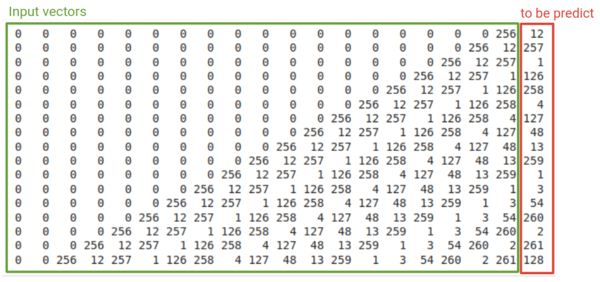

In [11]:
# example
mat = np.array([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,12],
                [13,14,15,16]])
print(mat[:,-1])
print()
print(mat[:,:-1])

[ 4  8 12 16]

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


In [12]:
# Convert target data to one-hot encodin
y = tf.keras.utils.to_categorical(y, num_classes = total_words)
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [13]:
# Define the model
model = Sequential()
model.add(Embedding(total_words, 10, input_length = max_sequence_len-1))
model.add(LSTM(128))
model.add(Dense(total_words, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# Train the model
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
51/51 [==============================] - 7s 88ms/step - loss: 6.2313 - accuracy: 0.0295
Epoch 2/500
51/51 [==============================] - 3s 55ms/step - loss: 5.7900 - accuracy: 0.0541
Epoch 3/500
51/51 [==============================] - 3s 50ms/step - loss: 5.7288 - accuracy: 0.0528
Epoch 4/500
51/51 [==============================] - 3s 49ms/step - loss: 5.7019 - accuracy: 0.0516
Epoch 5/500
51/51 [==============================] - 3s 50ms/step - loss: 5.6691 - accuracy: 0.0565
Epoch 6/500
51/51 [==============================] - 5s 91ms/step - loss: 5.6256 - accuracy: 0.0565
Epoch 7/500
51/51 [==============================] - 3s 53ms/step - loss: 5.5765 - accuracy: 0.0565
Epoch 8/500
51/51 [==============================] - 3s 53ms/step - loss: 5.5266 - accuracy: 0.0565
Epoch 9/500
51/51 [==============================] - 2s 49ms/step - loss: 5.4764 - accuracy: 0.0627
Epoch 10/500
51/51 [==============================] - 2s 48ms/step - loss: 5.4203 - accuracy: 0.0651

In [20]:
# Generate next word predictions
seed_text = input("Input: \t\t")
next_words = 2

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
	predicted_probs = model.predict(token_list)
	predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
	seed_text += " " + predicted_word

# visualization
print("Predicted:\t", seed_text)

Input: 		pizza extends beyond its
1/1 [==============================] - 0s 26ms/step
Predicted:	 pizza extends beyond its traditional forms
